## BUILDING NEURAL NETWORK FROM SCRATCH (CLASSIFICATION) 

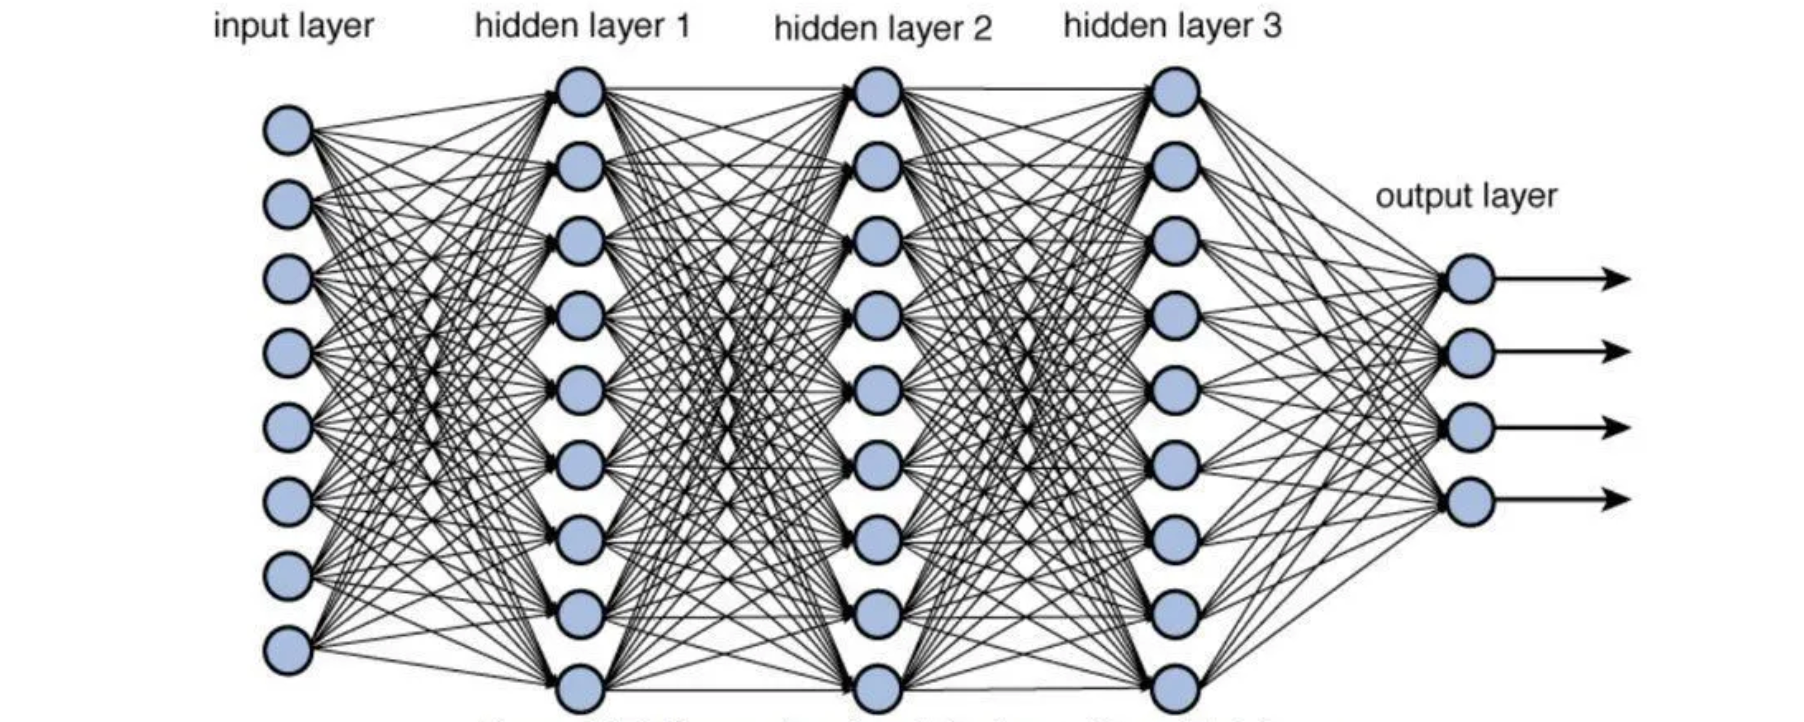

## <font color="blue">HEMANT THAPA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as st
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 1. FORWARD PASS

During the forward pass, input data is fed into the neural network, and it undergoes a series of computations in each layer. Each neuron's input is a weighted sum of the outputs from neurons in the previous layer, which is then passed through an activation function to produce the output of that neuron. This process is repeated for each layer until the final output is produced.

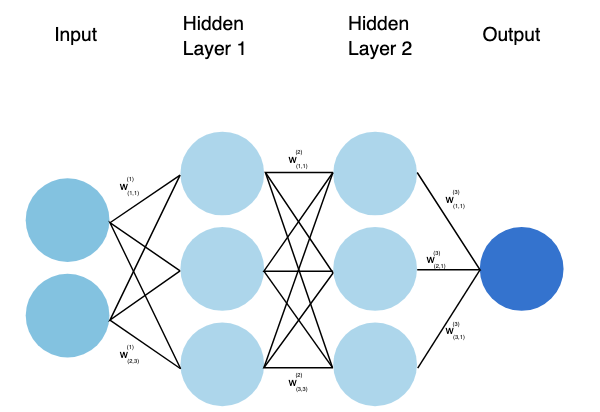

### 2. CALCULATION OF ERROR

The predicted output of the network is compared to the actual target output, and the difference between them is calculated. This difference is called the "error" or "loss."


### 3. BACKWARD PASS

The backpropagation algorithm involves propagating the error backward through the network. Starting from the output layer and moving backwards layer by layer, the algorithm computes the gradients of the loss with respect to the weights and biases of each neuron. These gradients indicate how much each weight and bias contributes to the overall error.


### 4. WEIGHT & BIAS UPDATES

With the gradients calculated, the algorithm updates the weights and biases of each neuron to minimize the error. This is typically done using an optimization algorithm such as gradient descent. The weights and biases are adjusted in the opposite direction of the gradients, aiming to gradually reduce the error over multiple iterations.

### 5. ITERATIONS

Steps 1 to 4 are repeated for a specified number of iterations or until the error converges to a satisfactory level. Each iteration consists of a forward pass to calculate predictions, a backward pass to compute gradients and update weights, and a weight update step.

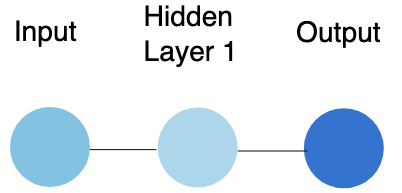

## BUILDING NEURAL NETWORK 

In [4]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, hidden_activation='relu', output_activation='sigmoid'):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
        
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, input_data):
        # Sum of inputs to the hidden layer
        self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        # Activation function for the hidden layer
        if self.hidden_activation == 'relu':
            self.hidden_output = self.relu(self.hidden_input)
        elif self.hidden_activation == 'sigmoid':
            self.hidden_output = self.sigmoid(self.hidden_input)
        else:
            raise ValueError("Invalid activation function for the hidden layer")
        
        # Weighted sum of inputs to the output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        # Activation function for the output layer
        if self.output_activation == 'sigmoid':
            self.output = self.sigmoid(self.output_input)
        else:
            raise ValueError("Invalid activation function for the output layer")

    def backward(self, input_data, target):
        # Error (loss)
        error = target - self.output
        # Gradient of the output layer
        delta_output = error * self.sigmoid_derivative(self.output)
        # Error in the hidden layer
        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        # Gradient of the hidden layer (using ReLU derivative)
        if self.hidden_activation == 'relu':
            delta_hidden = error_hidden * (self.hidden_output > 0).astype(int)
        elif self.hidden_activation == 'sigmoid':
            delta_hidden = error_hidden * self.hidden_output * (1 - self.hidden_output)
        else:
            raise ValueError("Invalid activation function for the hidden layer")

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(delta_output)
        self.bias_output += np.sum(delta_output, axis=0, keepdims=True)
        self.weights_input_hidden += input_data.T.dot(delta_hidden)
        self.bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True)

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, input_data, target, epochs):
        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, target)
            if epoch % 1000 == 0:
                loss = -np.mean(target * np.log(self.output) + (1 - target) * np.log(1 - self.output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, input_data):
        self.forward(input_data)
        return self.output

In [5]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])

In [6]:
neural_net = NeuralNetwork(input_size=2, hidden_size=4, output_size=1,
                           hidden_activation='relu', output_activation='sigmoid')
neural_net.train(input_data, target, epochs=1000)

Epoch 0, Loss: 1.1196


In [7]:
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = neural_net.predict(test_data)

In [8]:
print("Predictions:")
print(predictions)

Predictions:
[[0.02763279]
 [0.99096658]
 [0.98797302]
 [0.00950021]]


In [9]:
def plot_loss(loss_history):
    plt.figure()
    plt.plot(loss_history, color="red")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.grid(True)
    plt.show()

In [10]:
def plot_decision_boundary(nn, input_data, target):
    x_min, x_max = input_data[:, 0].min() - 1, input_data[:, 0].max() + 1
    y_min, y_max = input_data[:, 1].min() - 1, input_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(input_data[:, 0], input_data[:, 1], c=target[:, 0], cmap=plt.cm.Spectral)
    plt.xlabel('Input Feature 1')
    plt.ylabel('Input Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [11]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])

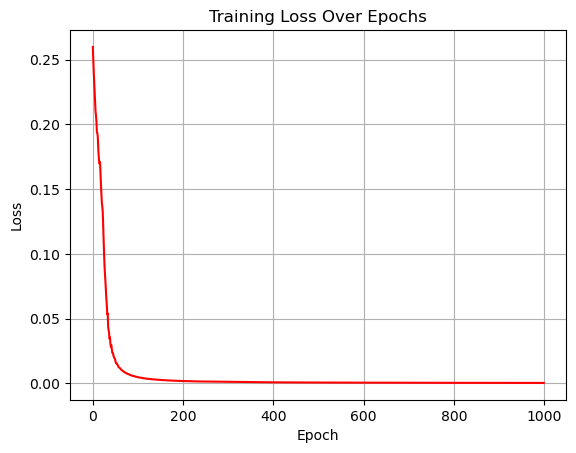

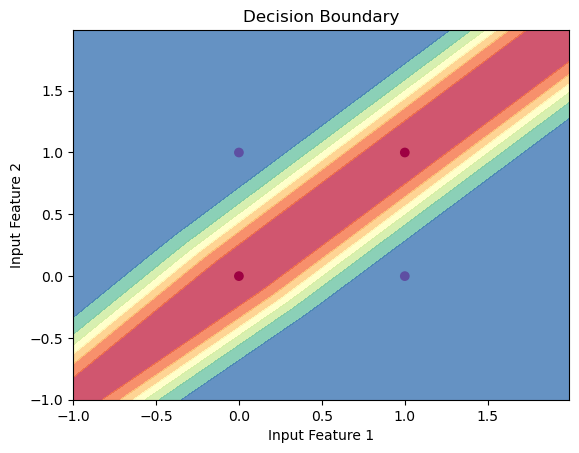

In [14]:
neural_net = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
loss_history = []
    
for epoch in range(1000):
    neural_net.forward(input_data)
    neural_net.backward(input_data, target)
    loss = np.mean(np.square(target - neural_net.output))
    loss_history.append(loss)

plot_loss(loss_history)
plot_decision_boundary(neural_net, input_data, target)

## TENSFLOW

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy')

In [17]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])

In [22]:
epochs = 10000
history = model.fit(input_data, target, epochs=epochs, verbose=0)

In [23]:
predictions = model.predict(input_data)
print("Predictions:")
print(predictions)

1/1 [==============================] - 0s 31ms/step
Predictions:
[[7.1592530e-04]
 [9.9965304e-01]
 [9.9937421e-01]
 [4.2627633e-04]]


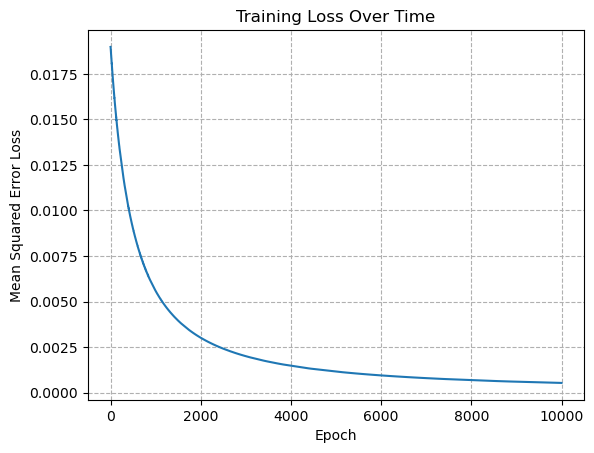

In [24]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss Over Time')
plt.grid(True,linestyle="--")
plt.show()

313/313 [==============================] - 1s 2ms/step


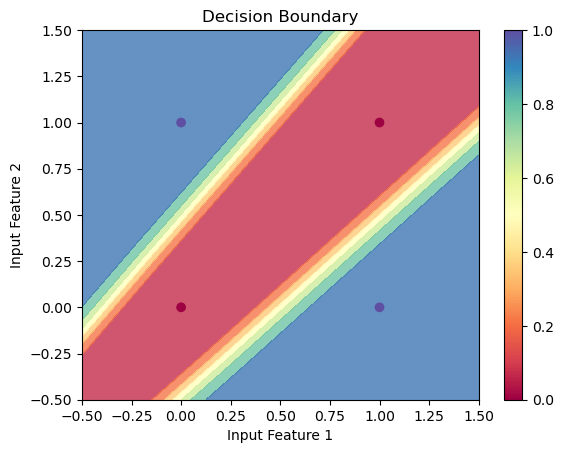

In [25]:
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(grid_points)
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(input_data[:, 0], input_data[:, 1], c=target, cmap=plt.cm.Spectral)
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('Decision Boundary')
plt.colorbar()
plt.show()


## NEURAL NETWORK

In [26]:
np.random.seed(0)
num_samples = 100

In [27]:
class_0_features = np.random.randn(num_samples, 2) + np.array([2, 2])
class_0_labels = np.zeros((num_samples, 1))
class_1_features = np.random.randn(num_samples, 2) + np.array([-2, -2])
class_1_labels = np.ones((num_samples, 1))

In [28]:
features = np.vstack([class_0_features, class_1_features])
labels = np.vstack([class_0_labels, class_1_labels])

In [29]:
data = list(zip(features, labels))
np.random.shuffle(data)
features, labels = zip(*data)

In [30]:
input_data = np.array(features)
target = np.array(labels)

In [31]:
input_data = (input_data - np.mean(input_data)) / np.std(input_data)

In [32]:
input_data[:5]

array([[ 1.85412042,  0.2476814 ],
       [-0.73198957, -1.23471086],
       [ 0.90373046,  1.00551203],
       [ 0.34643286,  1.23926252],
       [ 0.52847822,  0.57759289]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2, random_state=42)

In [34]:
neural_net = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
neural_net.train(X_train, y_train, epochs=1000)

Epoch 0, Loss: 1.1996


In [35]:
test_data = np.random.randn(50, 2)
test_labels = np.random.randint(2, size=(50, 1))

In [36]:
test_data = (test_data - np.mean(test_data)) / np.std(test_data)

In [37]:
predictions = neural_net.predict(X_test)

In [38]:
predicted_labels = (predictions > 0.5).astype(int)

In [39]:
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

In [40]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.89
Recall: 1.00
F1 Score: 0.94


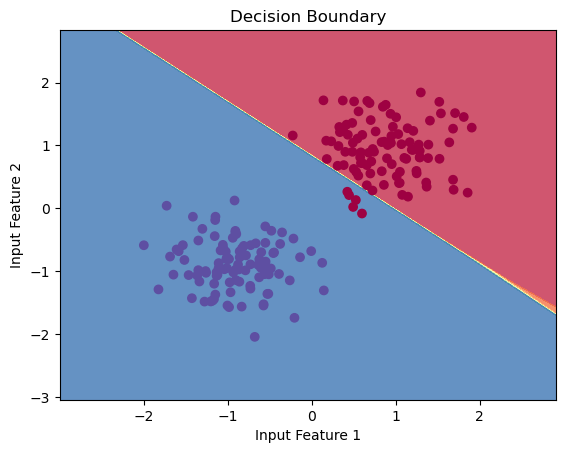

In [41]:
plot_decision_boundary(neural_net, input_data, target)

## TENSFLOW

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_data, target, epochs=10000, verbose=0)

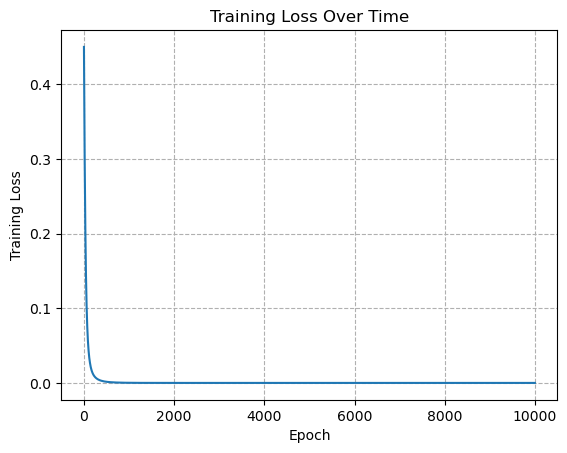

In [44]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Time')
plt.grid(True, linestyle="--")
plt.show()

In [45]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


10879/10879 [==============================] - 12s 1ms/step


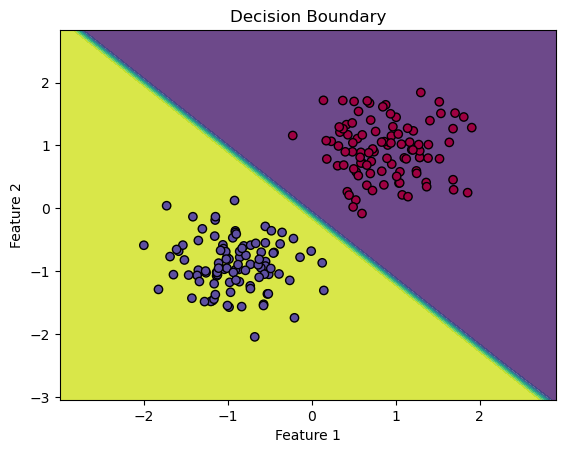

In [46]:
plot_decision_boundary(input_data, target, model)

In [47]:
predictions = model.predict(input_data)
predictions_binary = (predictions > 0.5).astype(int)

accuracy = accuracy_score(target, predictions_binary)
precision = precision_score(target, predictions_binary)
recall = recall_score(target, predictions_binary)
f1 = f1_score(target, predictions_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

7/7 [==============================] - 0s 2ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


REFERENCES: 

Towards Data Science. URL: https://towardsdatascience.com/training-deep-neural-networks-9fdb1964b964

Serokell Blog. URL: https://serokell.io/blog/introduction-to-convolutional-neural-networks

Kaggle. URL: https://www.kaggle.com/code/romaintha/an-introduction-to-backpropagation